In [1]:
import numpy as np

In [2]:
feature_x = np.linspace(-1, 1, 101)
x1 = feature_x / np.max(feature_x)
x2 = np.power(feature_x,2) / np.max(np.power(feature_x,2))
x3 = np.power(feature_x,3) / np.max(np.power(feature_x,3))
x4 = np.power(feature_x,4) / np.max(np.power(feature_x,4))
x5 = np.power(feature_x,5) / np.max(np.power(feature_x,5))

target_y = 4 - 3*x1 + x2 + 2*x3 - x4 + x5 + (np.random.randn(*feature_x.shape) * 0.1)



In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

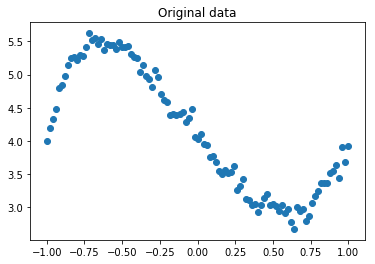

In [4]:
plt.figure(1)
plt.title("Original data")
plt.scatter(feature_x,target_y)

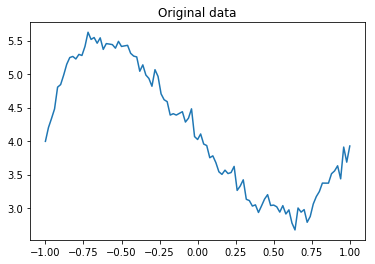

In [5]:
plt.figure(2)
plt.title("Original data")
plt.plot(feature_x,target_y)

In [6]:
import tensorflow as tf

/Users/nikhilkatukuri/Desktop/anaconda/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
def model(X, w):
    terms = []    
    for i in range(int(w.shape[0])):
        term = tf.multiply(w[i],  tf.pow(X, i))
        terms.append(term)
    return(tf.add_n(terms))



In [8]:
learning_rate = 0.05
epochs = 500

In [9]:
order = 6
tf.reset_default_graph()
X = tf.placeholder("float")
target = tf.placeholder("float")

In [10]:
w = tf.Variable([0.0] * order, name="weights")

In [11]:
model_output = model(X, w)

# square mean error

cost = tf.reduce_mean(tf.square(target - model_output))

In [12]:
minimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


In [13]:
# initializer
init = tf.global_variables_initializer()

# run initializer
sess = tf.Session()
sess.run(init)

In [14]:
%%time

for epoch in range(epochs):
    
    for (x, y) in zip(feature_x, target_y):
        
        sess.run(minimizer, feed_dict={X: x, target: y})

CPU times: user 35 s, sys: 8.7 s, total: 43.7 s
Wall time: 22.3 s


In [15]:
w

<tf.Variable 'weights:0' shape=(6,) dtype=float32_ref>

In [16]:
learned_w = sess.run(w)

In [17]:
print(learned_w)

[ 4.04111   -2.9912064  0.8123299  2.1013656 -0.8462657  0.7935318]


In [18]:
sess.close()

In [19]:
def calculate_y(x, w):
    y = 0
    for i in range(w.shape[0]):
        y += w[i] * np.power(x, i)
    return y


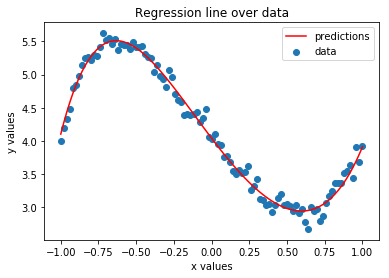

In [20]:
plt.figure(3)
plt.title("Regression line over data")

plt.xlabel("x values")
plt.ylabel("y values")

# original data
plt.scatter(feature_x,target_y,label="data")

#  predicted y values
predictions = calculate_y(feature_x, learned_w)

#  regression line 
plt.plot(feature_x, predictions, 'r', label="predictions")
plt.legend()
plt.show()